Prompt: Beri kode untuk connect gcolab dengan gdrive!

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Prompt: Beri kode untuk read dataset sebagai dataframe!

In [3]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/StudentsPerformance.csv')

Prompt: Beri kode untuk menampilkan baris dataframe!

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Info terkait kolom parental level of education:

- Bachelor's degree: Orang tua siswa telah menyelesaikan pendidikan sarjana (S1).
- Master's degree: Orang tua siswa telah menyelesaikan pendidikan pascasarjana (S2).
- Associate's degree: Gelar akademik yang biasanya didapat setelah dua tahun kuliah, biasanya di perguruan tinggi komunitas.
- Some college: Orang tua telah berkuliah di universitas tetapi tidak sampai lulus.
- High school: Orang tua siswa hanya menyelesaikan pendidikan tingkat SMA.
- Some high school: Orang tua siswa hanya bersekolah di SMA tetapi tidak menyelesaikannya.

Info terkait kolom lunch:

- Standard: Siswa membayar untuk makanan siang dengan harga penuh, yang biasanya menunjukkan kondisi ekonomi keluarga yang baik.
- Free/reduced: Siswa menerima makanan siang gratis atau dengan potongan harga, yang biasanya diberikan kepada keluarga dengan penghasilan lebih rendah atau siswa yang memenuhi syarat program subsidi.


Prompt: Beri kode untuk menampilkan info dari dataframe!

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Prompt:

Aku punya dataset berikut:
StudentsPerformance.csv

Dan informasi terkait dataframe saya sebagai berikut:
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
    Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   object

 1   race/ethnicity               1000 non-null   object

 2   parental level of education  1000 non-null   object

 3   lunch                        1000 non-null   object

 4   test preparation course      1000 non-null   object

 5   math score                   1000 non-null   int64

 6   reading score                1000 non-null   int64

 7   writing score                1000 non-null   int64

dtypes: int64(3), object(5)

Beri sample kode python untuk dapat menampilkan persentase dari data bertipe kategorikal dalam bentuk pie chart, sehingga saya bisa copy paste ke google colab.

In [6]:
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
   print(f"Unique Values in {column}:")
   print(df[column].unique())
   print()

Unique Values in gender:
['female' 'male']

Unique Values in race/ethnicity:
['group B' 'group C' 'group A' 'group D' 'group E']

Unique Values in parental level of education:
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Unique Values in lunch:
['standard' 'free/reduced']

Unique Values in test preparation course:
['none' 'completed']



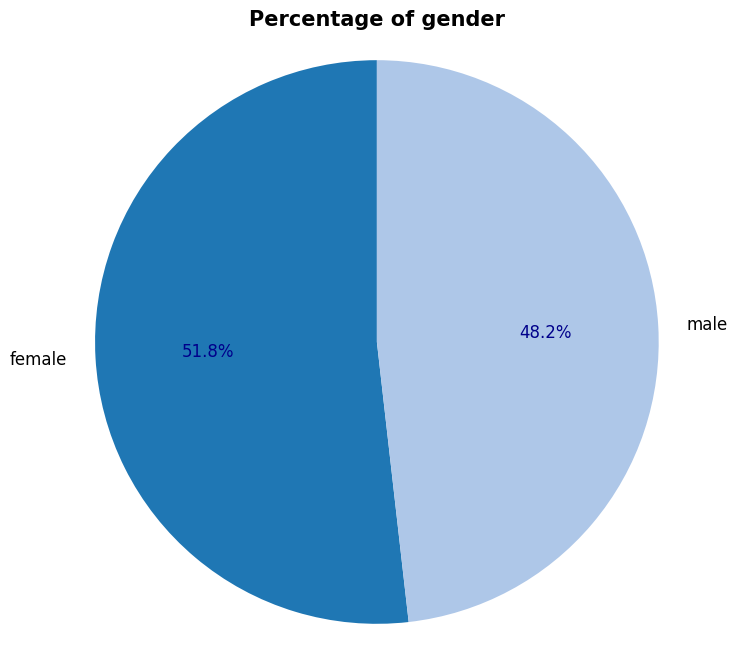

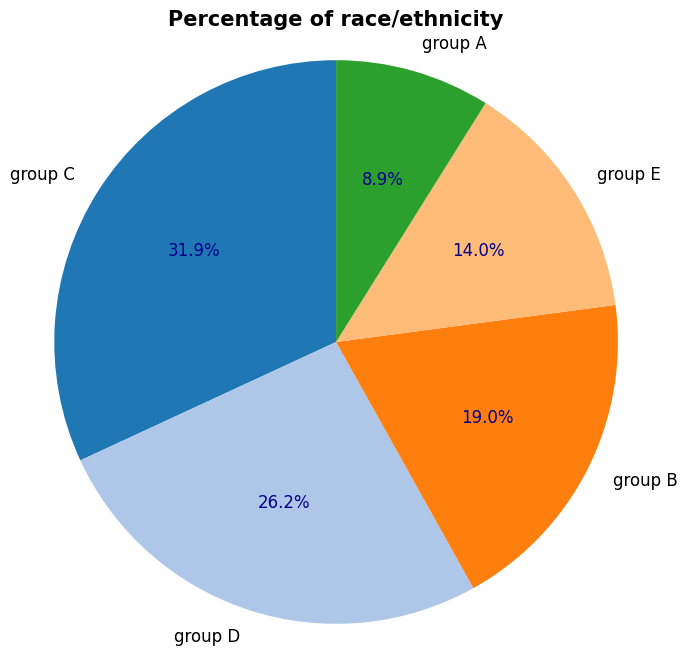

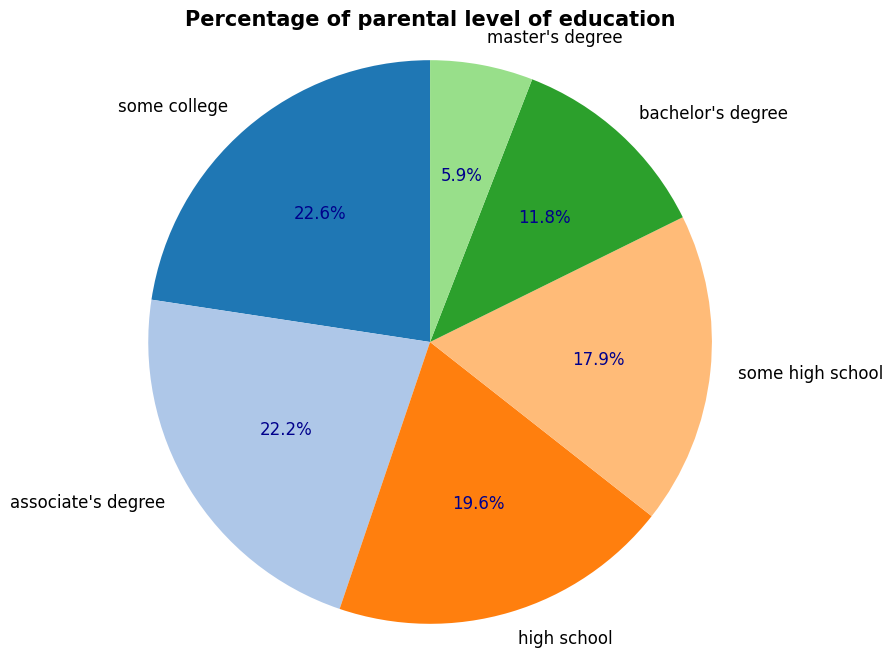

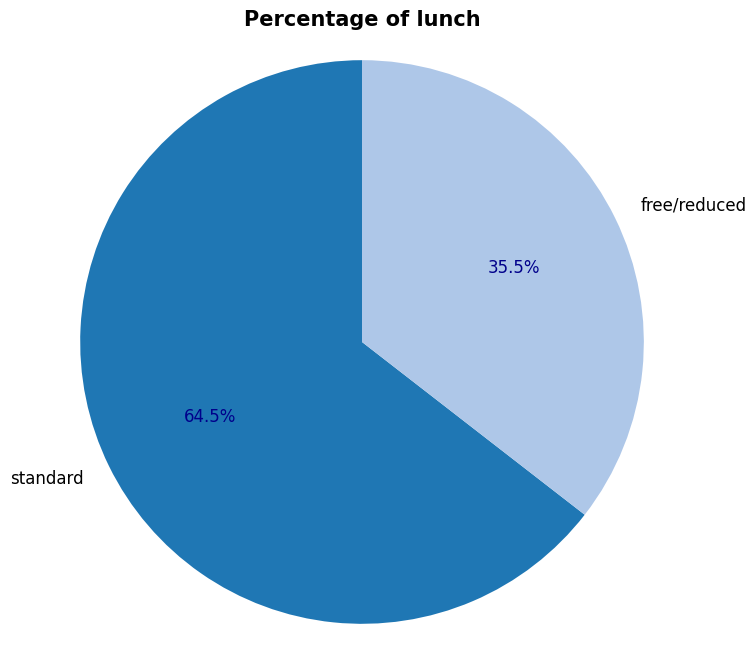

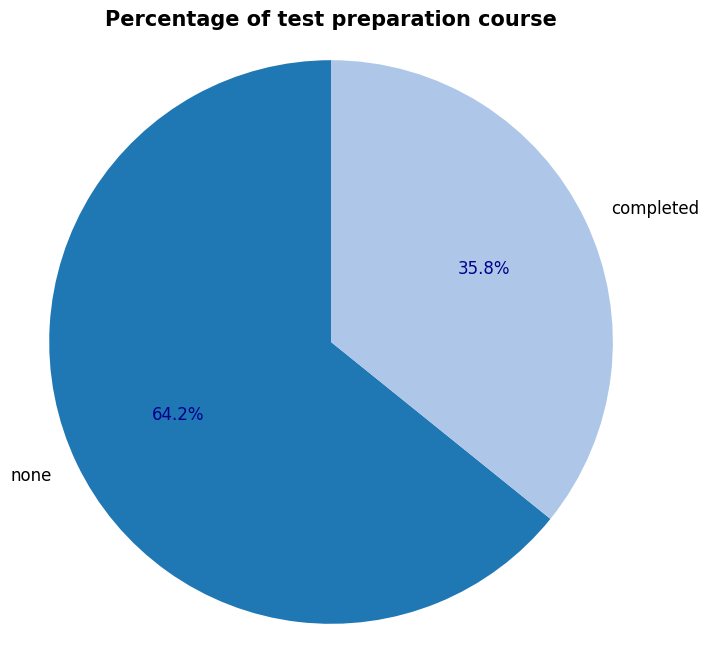

In [7]:
import matplotlib.pyplot as plt

# Function to create an improved pie chart
def plot_pie_chart(column):
    # Calculate percentage for each category
    category_counts = df[column].value_counts()
    category_percentages = category_counts / category_counts.sum() * 100

    # Highlight the largest slice
    explode = [0.1 if i == category_percentages.idxmax() else 0 for i in category_percentages.index]

    # Create pie chart with enhanced styling
    plt.figure(figsize=(8, 8))
    wedges, texts, autotexts = plt.pie(
        category_percentages,
        labels=category_percentages.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.tab20.colors,  # Use tab20 color palette
        shadow=False  # Add shadow for depth
    )

    # Customize the text
    for text in texts:
        text.set_fontsize(12)  # Label font size
    for autotext in autotexts:
        autotext.set_fontsize(12)  # Percentage font size
        autotext.set_color('darkblue')  # Dark blue for percentage text

    plt.title(f'Percentage of {column}', fontsize=15, fontweight='bold')
    plt.axis('equal')  # Ensure the pie chart is a circle
    plt.show()

# Display pie chart for each categorical column
for column in categorical_columns:
    plot_pie_chart(column)


Prompt:

Dari kode berikut, beri style color yang aesthetic:


```



import matplotlib.pyplot as plt

def plot_pie_chart(column_name):
  
    data = df[column_name].value_counts()
    labels = data.index
    sizes = data.values


    plt.figure(figsize=(7,7))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    plt.axis('equal')  # Untuk memastikan pie chart berbentuk lingkaran
    plt.title(f'Percentage of {column_name}')
    plt.show()

plot_pie_chart('gender')


plot_pie_chart('race/ethnicity')
plot_pie_chart('lunch')
plot_pie_chart('parental level of education')
plot_pie_chart('test preparation course')

```

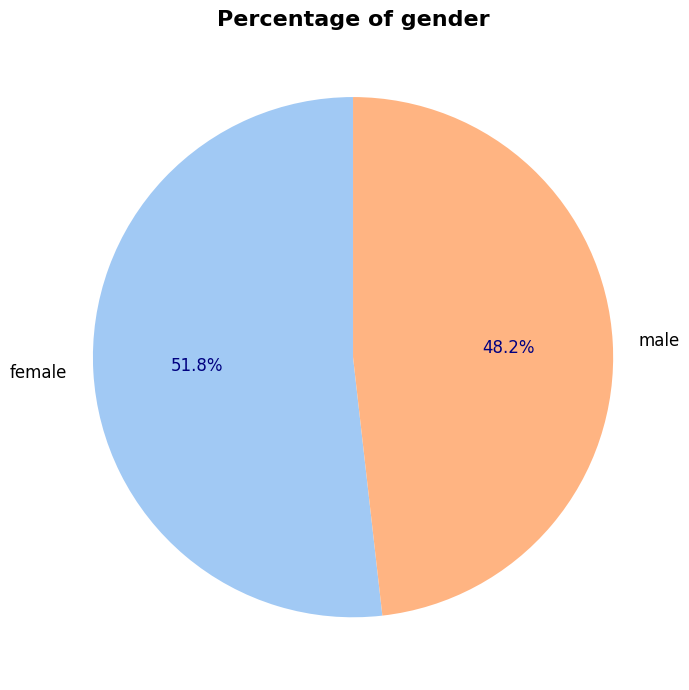

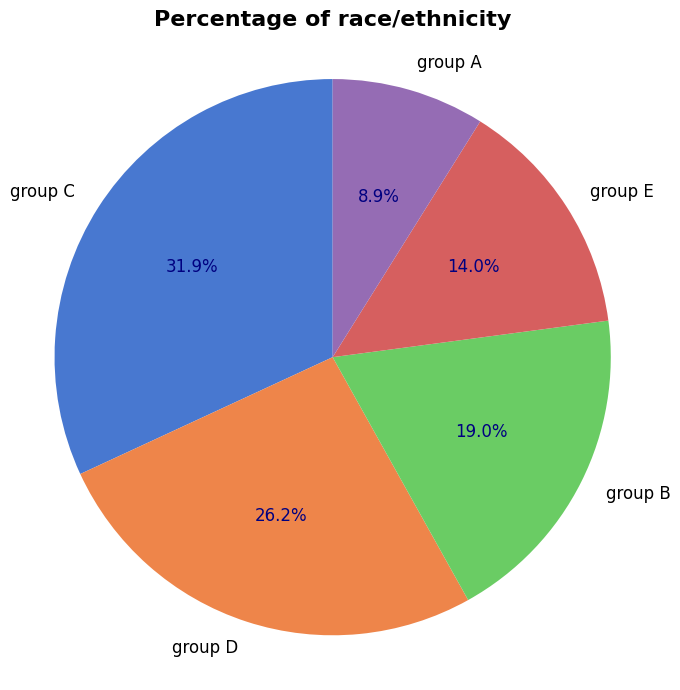

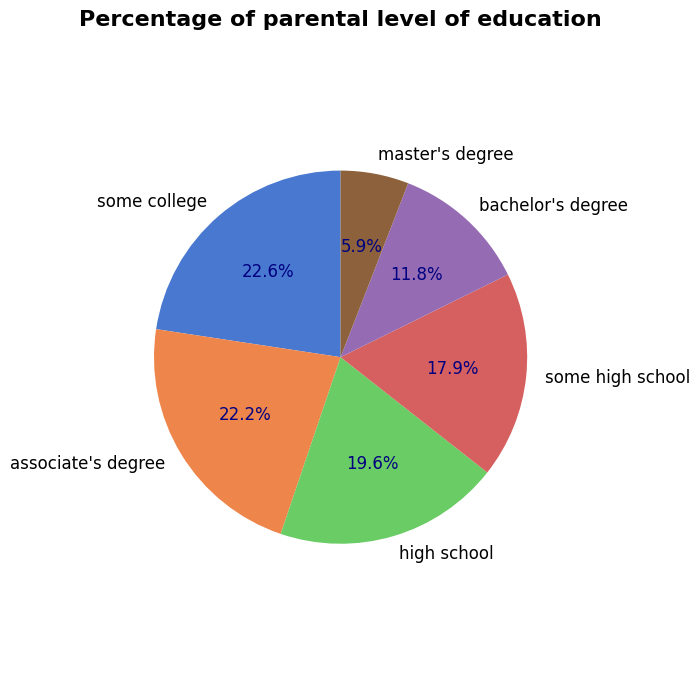

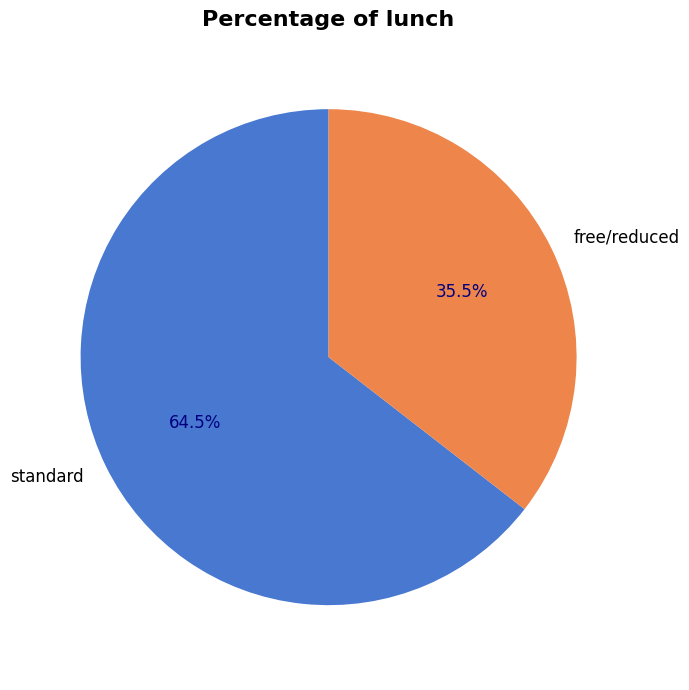

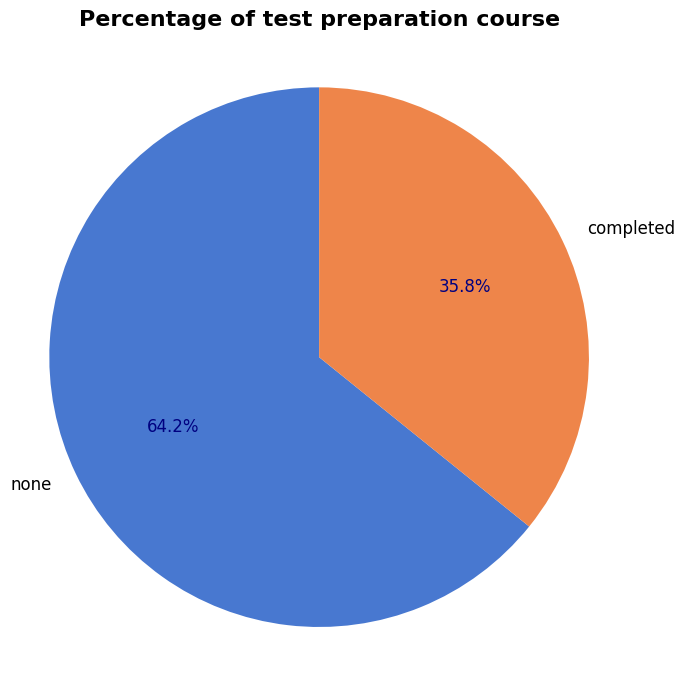

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define categorical columns and pastel color palette
categorical_columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
pastel_colors = sns.color_palette('pastel')

# Function to create an improved pie chart
def plot_pie_chart(column):
    # Calculate percentage for each category
    category_counts = df[column].value_counts()
    category_percentages = category_counts / category_counts.sum() * 100

    # Highlight the largest slice
    explode = [0.1 if i == category_percentages.idxmax() else 0 for i in category_percentages.index]

    # Rotate through different pastel color palettes for variation
    colors = sns.color_palette('pastel') if column == categorical_columns[0] else sns.color_palette('muted')

    # Create pie chart with enhanced styling
    plt.figure(figsize=(7, 7))
    wedges, texts, autotexts = plt.pie(
        category_percentages,
        labels=category_percentages.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,  # Use selected color palette

    )

    # Customize the text and appearance
    for text in texts:
        text.set_fontsize(12)  # Label font size
    for autotext in autotexts:
        autotext.set_fontsize(12)  # Percentage font size
        autotext.set_color('navy')  # Navy color for percentage text

    plt.title(f'Percentage of {column}', fontsize=16, fontweight='bold')
    plt.axis('equal')  # Ensure the pie chart is a circle
    plt.tight_layout()  # Improve layout
    plt.show()

# Display pie chart for each categorical column
for column in categorical_columns:
    plot_pie_chart(column)


Prompt:

Dari kode berikut, beri style warm color:


```



import matplotlib.pyplot as plt

def plot_pie_chart(column_name):
  
    data = df[column_name].value_counts()
    labels = data.index
    sizes = data.values


    plt.figure(figsize=(7,7))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    plt.axis('equal')  # Untuk memastikan pie chart berbentuk lingkaran
    plt.title(f'Percentage of {column_name}')
    plt.show()

plot_pie_chart('gender')


plot_pie_chart('race/ethnicity')
plot_pie_chart('lunch')
plot_pie_chart('parental level of education')
plot_pie_chart('test preparation course')

```

Prompt:

Beri kode python yang menunjukkan visualisasi nilai math, reading, dan writing siswa, dengan melihat pengaruh dari gender, race/ethnicity, parental level of education, lunch, test preparation course-nya!

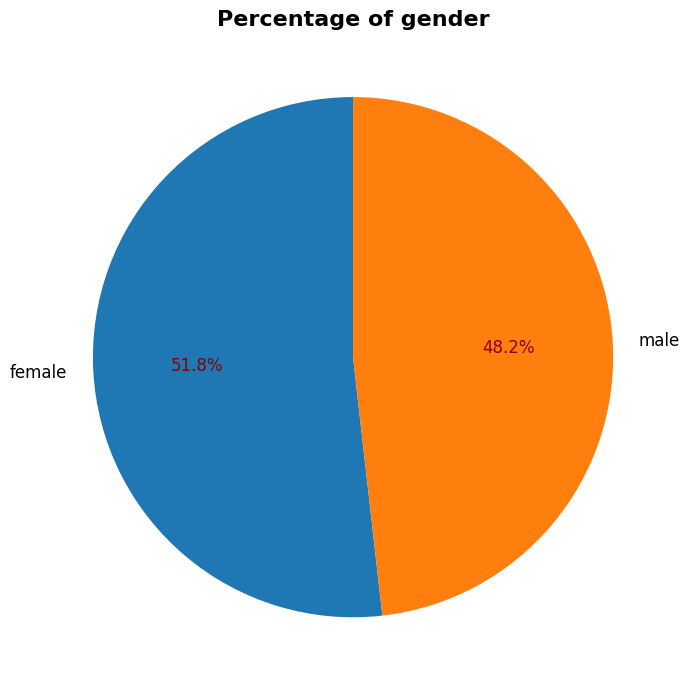

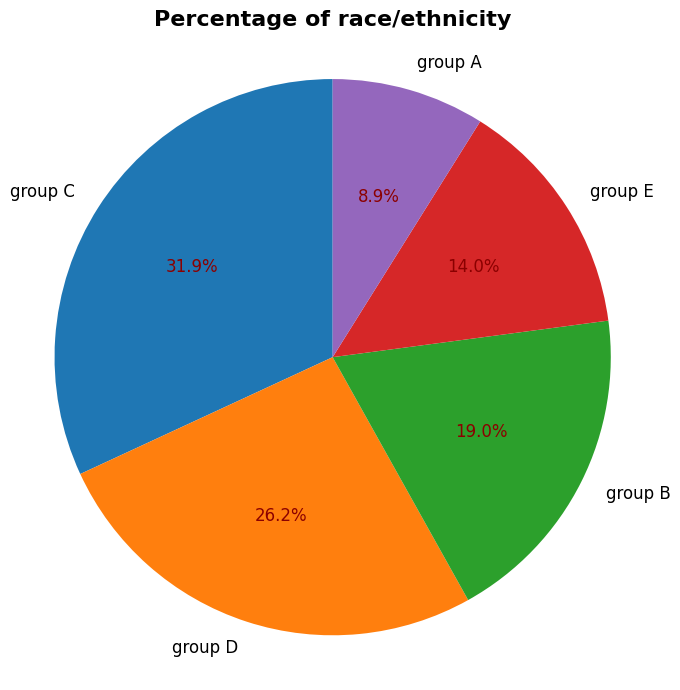

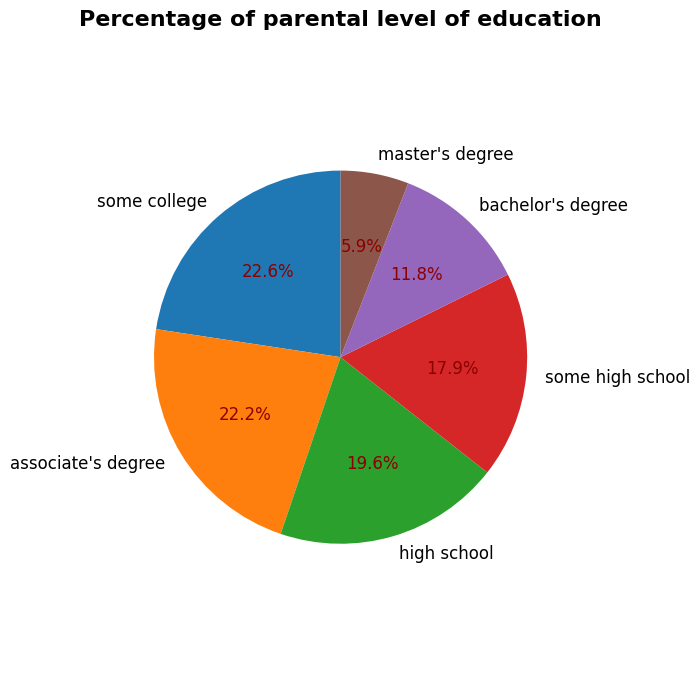

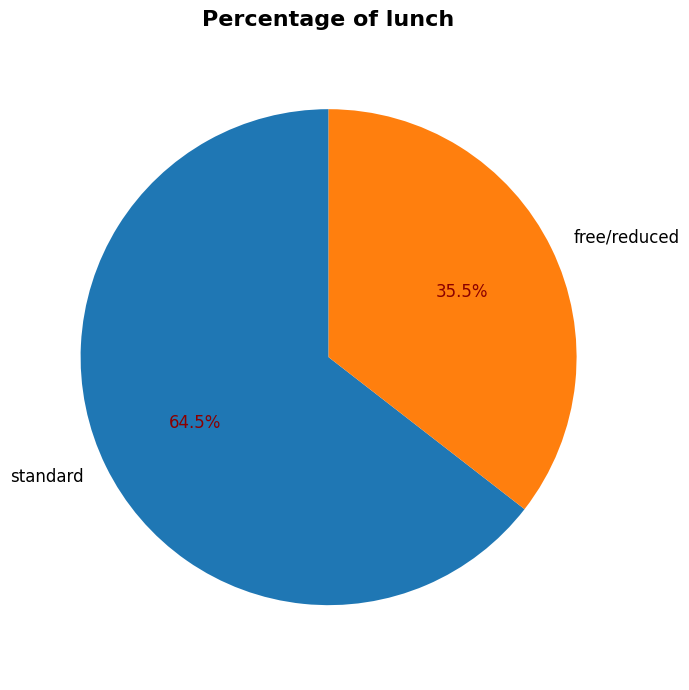

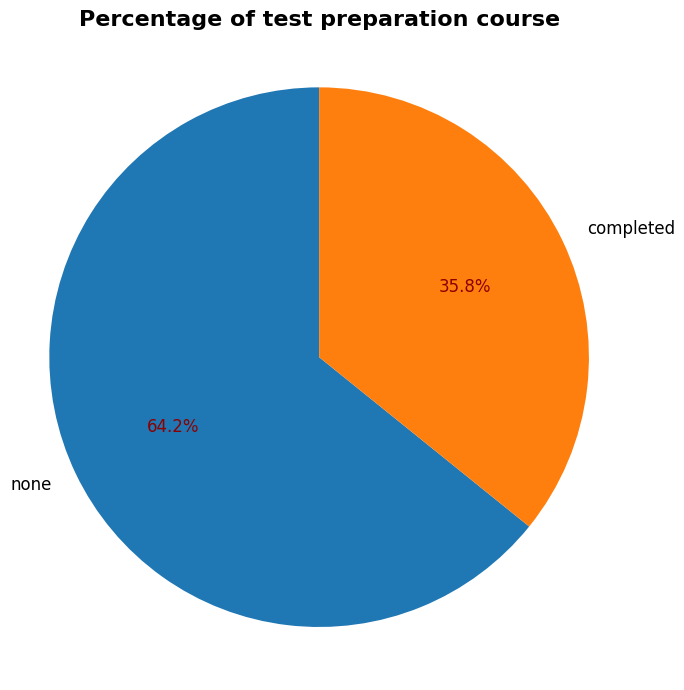

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define categorical columns
categorical_columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

# Function to create an enhanced pie chart with warm colors
def plot_pie_chart(column):
    # Calculate the percentage for each category
    category_counts = df[column].value_counts()
    category_percentages = category_counts / category_counts.sum() * 100

    # Generate a warm color palette based on the number of categories
    colors = sns.color_palette("OrRd", len(category_counts))

    # Create pie chart with enhanced styling
    plt.figure(figsize=(7, 7))
    wedges, texts, autotexts = plt.pie(
        category_percentages,
        labels=category_percentages.index,
        autopct='%1.1f%%',
        startangle=90,

    )

    # Customize text appearance for readability
    for text in texts:
        text.set_fontsize(12)
    for autotext in autotexts:
        autotext.set_fontsize(12)
        autotext.set_color('darkred')  # Dark red for percentage text

    plt.title(f'Percentage of {column}', fontsize=16, fontweight='bold')
    plt.axis('equal')  # Ensure the pie chart is a circle
    plt.tight_layout()  # Improve layout spacing
    plt.show()

# Display pie chart for each categorical column with unique colors
for column in categorical_columns:
    plot_pie_chart(column)


Prompt:

Dari kode berikut, beri style pastle color:


```



import matplotlib.pyplot as plt

def plot_pie_chart(column_name):
  
    data = df[column_name].value_counts()
    labels = data.index
    sizes = data.values


    plt.figure(figsize=(7,7))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    plt.axis('equal')  # Untuk memastikan pie chart berbentuk lingkaran
    plt.title(f'Percentage of {column_name}')
    plt.show()

plot_pie_chart('gender')


plot_pie_chart('race/ethnicity')
plot_pie_chart('lunch')
plot_pie_chart('parental level of education')
plot_pie_chart('test preparation course')

```

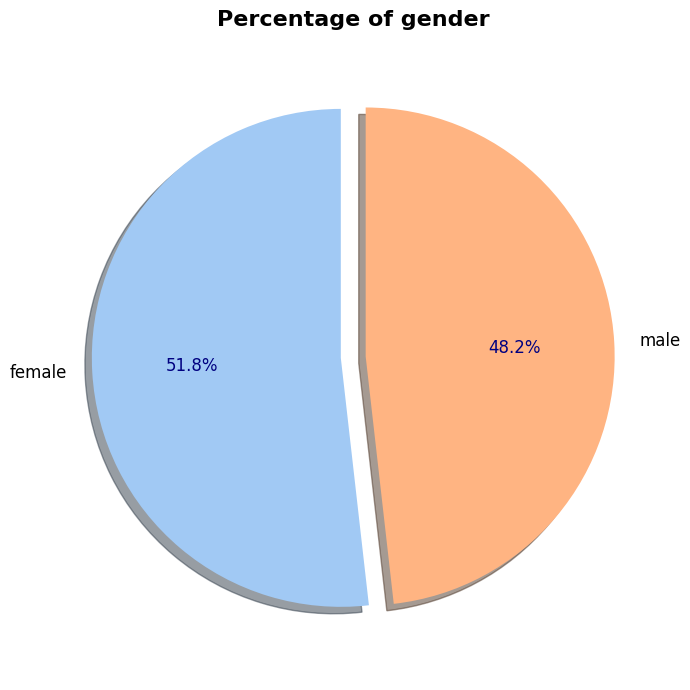

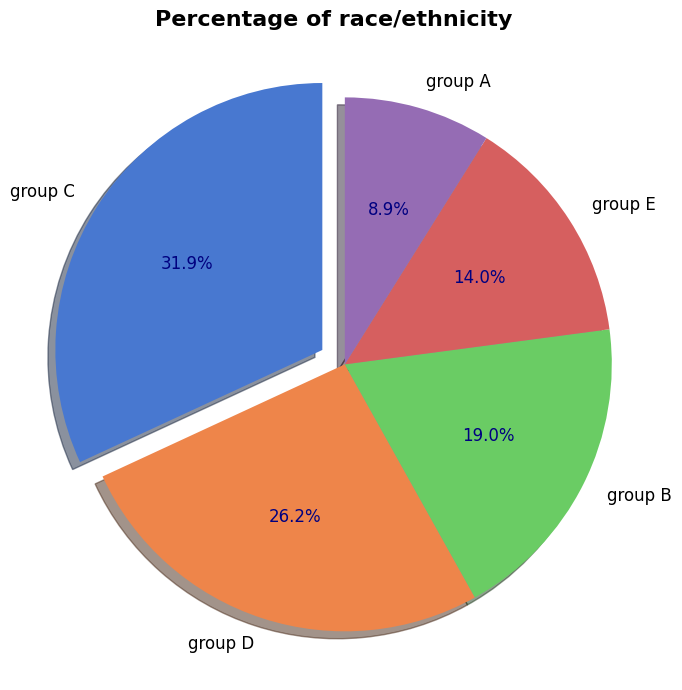

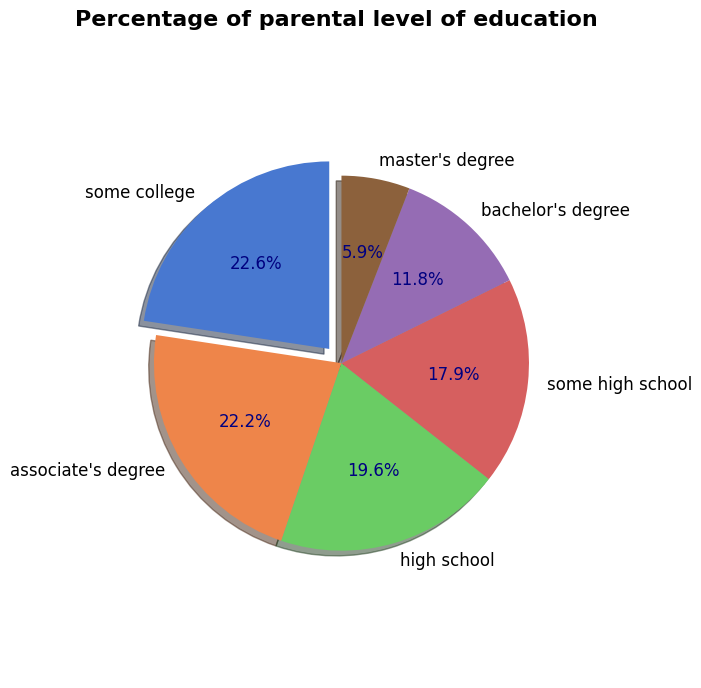

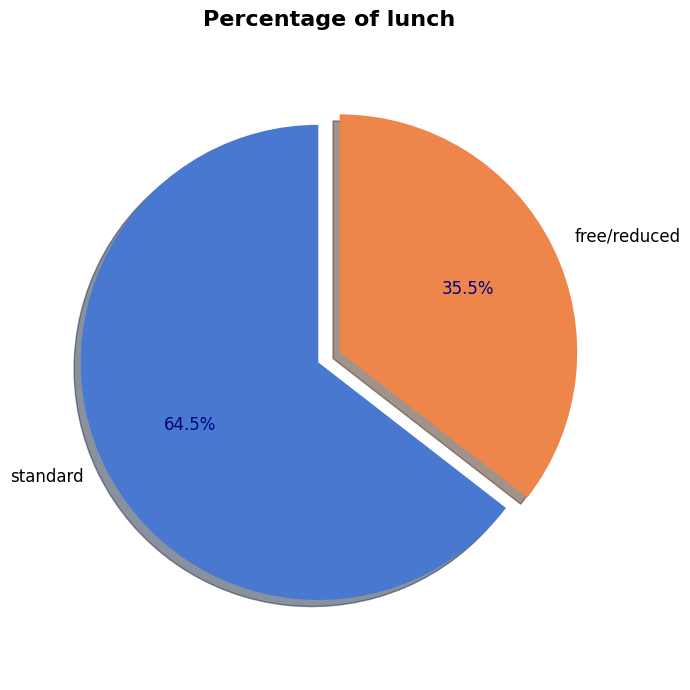

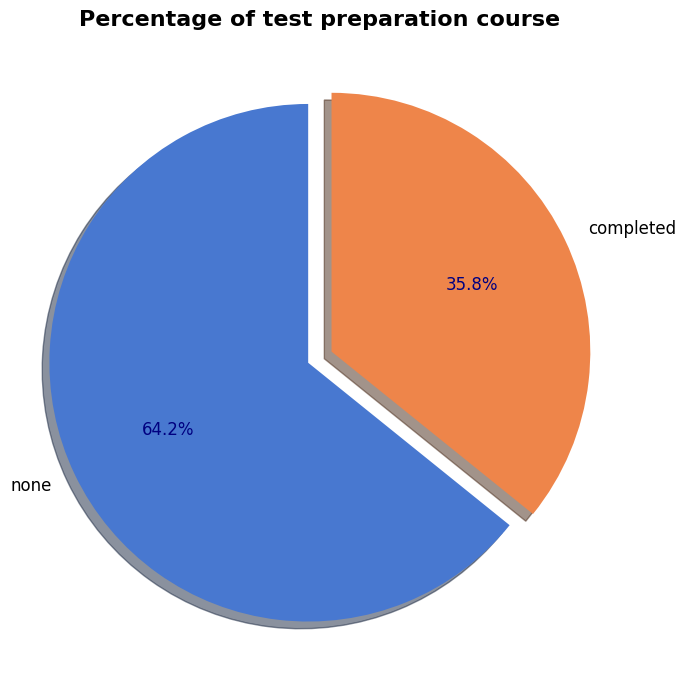

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define categorical columns and pastel color palette
categorical_columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
pastel_colors = sns.color_palette('pastel')

# Function to create an improved pie chart
def plot_pie_chart(column):
    # Calculate percentage for each category
    category_counts = df[column].value_counts()
    category_percentages = category_counts / category_counts.sum() * 100

    # Highlight the largest slice
    explode = [0.1 if i == category_percentages.idxmax() else 0 for i in category_percentages.index]

    # Rotate through different pastel color palettes for variation
    colors = sns.color_palette('pastel') if column == categorical_columns[0] else sns.color_palette('muted')

    # Create pie chart with enhanced styling
    plt.figure(figsize=(7, 7))
    wedges, texts, autotexts = plt.pie(
        category_percentages,
        labels=category_percentages.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,  # Use selected color palette
        explode=explode,  # Slightly explode the largest slice
        shadow=True  # Add shadow for depth
    )

    # Customize the text and appearance
    for text in texts:
        text.set_fontsize(12)  # Label font size
    for autotext in autotexts:
        autotext.set_fontsize(12)  # Percentage font size
        autotext.set_color('navy')  # Navy color for percentage text

    plt.title(f'Percentage of {column}', fontsize=16, fontweight='bold')
    plt.axis('equal')  # Ensure the pie chart is a circle
    plt.tight_layout()  # Improve layout
    plt.show()

# Display pie chart for each categorical column
for column in categorical_columns:
    plot_pie_chart(column)


Prompt:

Beri kode untuk melihat distribusi nilai math, reading dan writing dg informasi dataframe sebagai berikut:

Data columns (total 8 columns):
  Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   object

 1   race/ethnicity               1000 non-null   object

 2   parental level of education  1000 non-null   object

 3   lunch                        1000 non-null   object

 4   test preparation course      1000 non-null   object

 5   math score                   1000 non-null   int64

 6   reading score                1000 non-null   int64

 7   writing score                1000 non-null   int64

dtypes: int64(3), object(5)

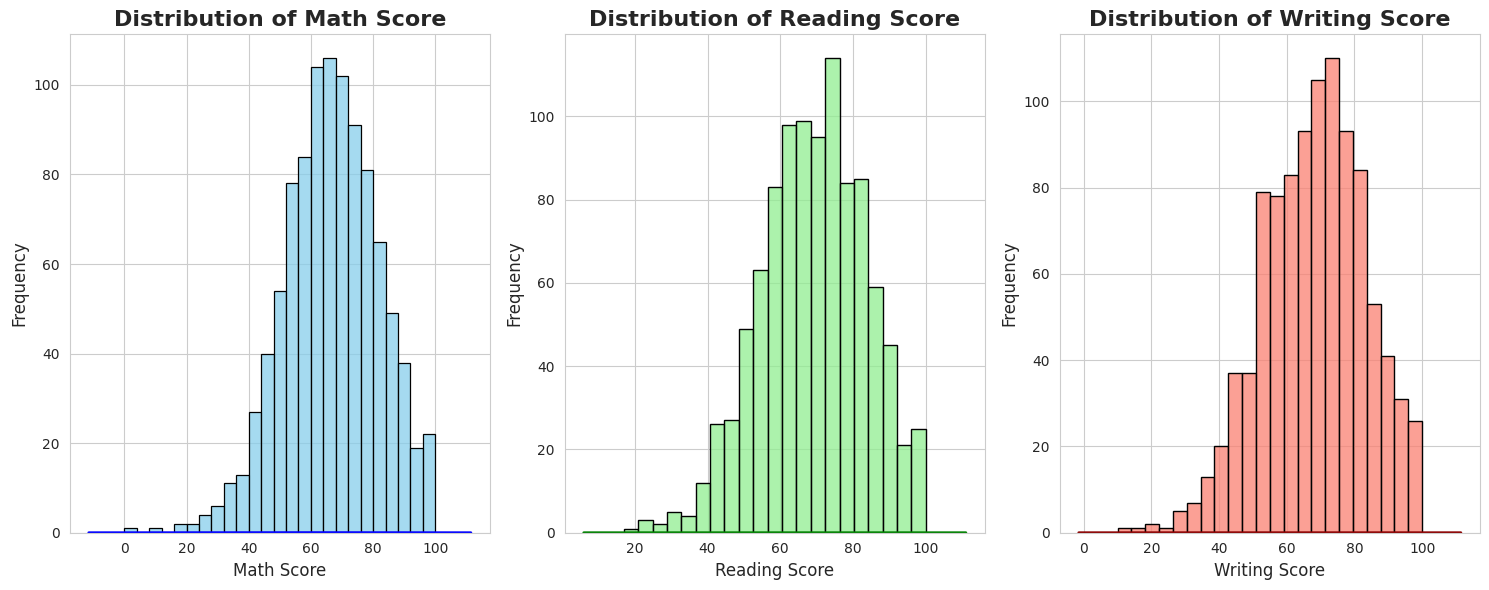

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set overall style
sns.set_style("whitegrid")
plt.figure(figsize=(15, 6))

# Plot distribution for math score
plt.subplot(1, 3, 1)
sns.histplot(df['math score'], color='skyblue', edgecolor='black')
sns.kdeplot(df['math score'], color='blue', linewidth=2)
plt.title('Distribution of Math Score', fontsize=16, fontweight='bold')
plt.xlabel('Math Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Plot distribution for reading score
plt.subplot(1, 3, 2)
sns.histplot(df['reading score'], color='lightgreen', edgecolor='black')
sns.kdeplot(df['reading score'], color='green', linewidth=2)
plt.title('Distribution of Reading Score', fontsize=16, fontweight='bold')
plt.xlabel('Reading Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Plot distribution for writing score
plt.subplot(1, 3, 3)
sns.histplot(df['writing score'], color='salmon', edgecolor='black')
sns.kdeplot(df['writing score'], color='darkred', linewidth=2)
plt.title('Distribution of Writing Score', fontsize=16, fontweight='bold')
plt.xlabel('Writing Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Layout adjustments
plt.tight_layout()
plt.show()


Prompt:

Beri kode python untuk melihat jumlah siswa yang fail dan pass untuk masing-masing pelajaran (math, reading, writing score). Dengan minimal nilai yang dianggap pass adalah 75!

Math Pass/Fail Counts:
math_status
fail    705
pass    295
Name: count, dtype: int64

Reading Pass/Fail Counts:
reading_status
fail    630
pass    370
Name: count, dtype: int64

Writing Pass/Fail Counts:
writing_status
fail    650
pass    350
Name: count, dtype: int64


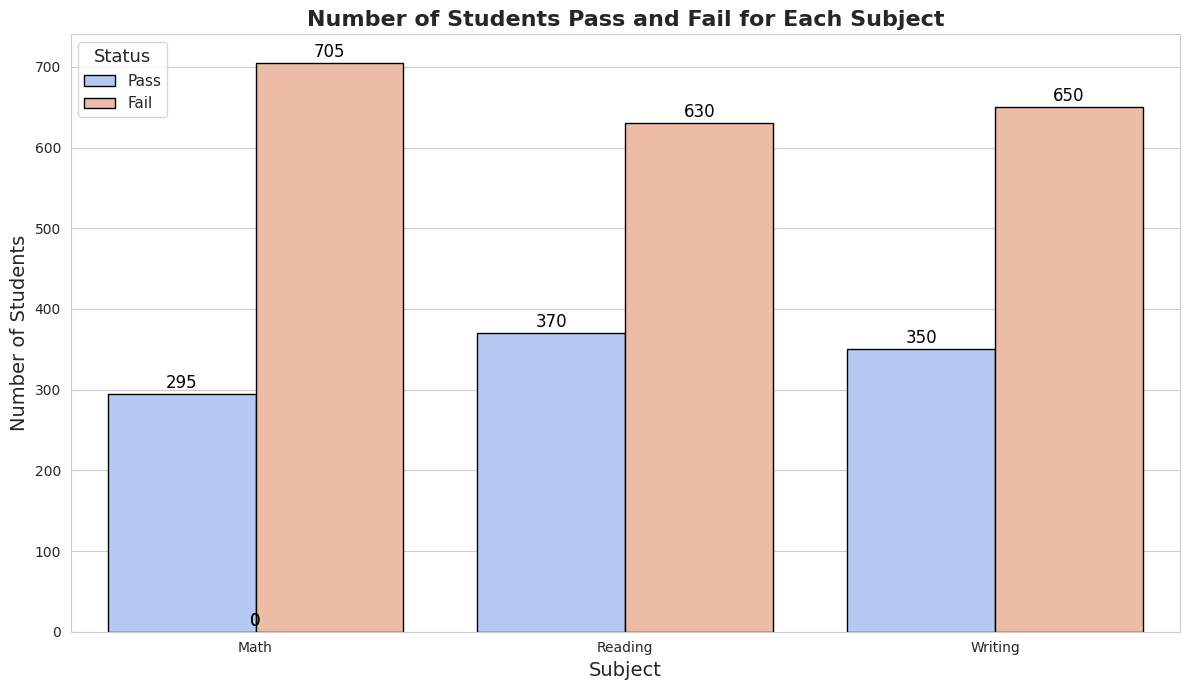

In [12]:
# Menentukan batas kelulusan
pass_threshold = 75

# Membuat kolom baru untuk mengklasifikasikan pass/fail untuk setiap pelajaran
df['math_status'] = df['math score'].apply(lambda x: 'pass' if x >= pass_threshold else 'fail')
df['reading_status'] = df['reading score'].apply(lambda x: 'pass' if x >= pass_threshold else 'fail')
df['writing_status'] = df['writing score'].apply(lambda x: 'pass' if x >= pass_threshold else 'fail')

# Menghitung jumlah siswa yang pass dan fail untuk setiap pelajaran
math_pass_fail = df['math_status'].value_counts()
reading_pass_fail = df['reading_status'].value_counts()
writing_pass_fail = df['writing_status'].value_counts()

# Menampilkan hasil
print("Math Pass/Fail Counts:")
print(math_pass_fail)
print("\nReading Pass/Fail Counts:")
print(reading_pass_fail)
print("\nWriting Pass/Fail Counts:")
print(writing_pass_fail)

# Membuat DataFrame untuk visualisasi
status_df = pd.DataFrame({
    'Subject': ['Math', 'Math', 'Reading', 'Reading', 'Writing', 'Writing'],
    'Status': ['Pass', 'Fail', 'Pass', 'Fail', 'Pass', 'Fail'],
    'Count': [math_pass_fail['pass'], math_pass_fail['fail'],
              reading_pass_fail['pass'], reading_pass_fail['fail'],
              writing_pass_fail['pass'], writing_pass_fail['fail']]
})

import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

# Enhanced bar plot
bar_plot = sns.barplot(x='Subject', y='Count', hue='Status', data=status_df, palette='coolwarm', edgecolor='black')
plt.title('Number of Students Pass and Fail for Each Subject', fontsize=16, fontweight='bold')
plt.xlabel('Subject', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)

# Adding annotations on top of bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      fontsize=12, color='black',
                      xytext=(0, 8),
                      textcoords='offset points')

plt.legend(title='Status', title_fontsize='13', fontsize='11')
plt.tight_layout()
plt.show()

Prompt:

Beri kode python yang menunjukkan visualisasi nilai math, reading, dan writing siswa, dengan melihat pengaruh dari gender, race/ethnicity, parental level of education, lunch, test preparation course-nya!

<Figure size 1600x1000 with 0 Axes>

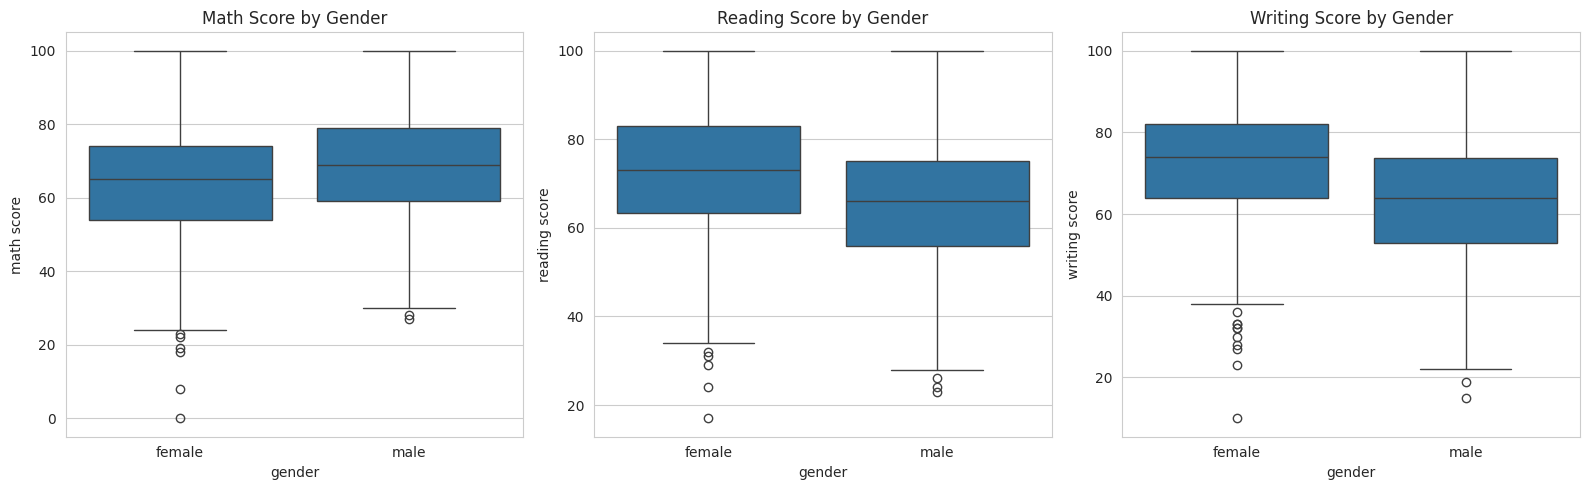

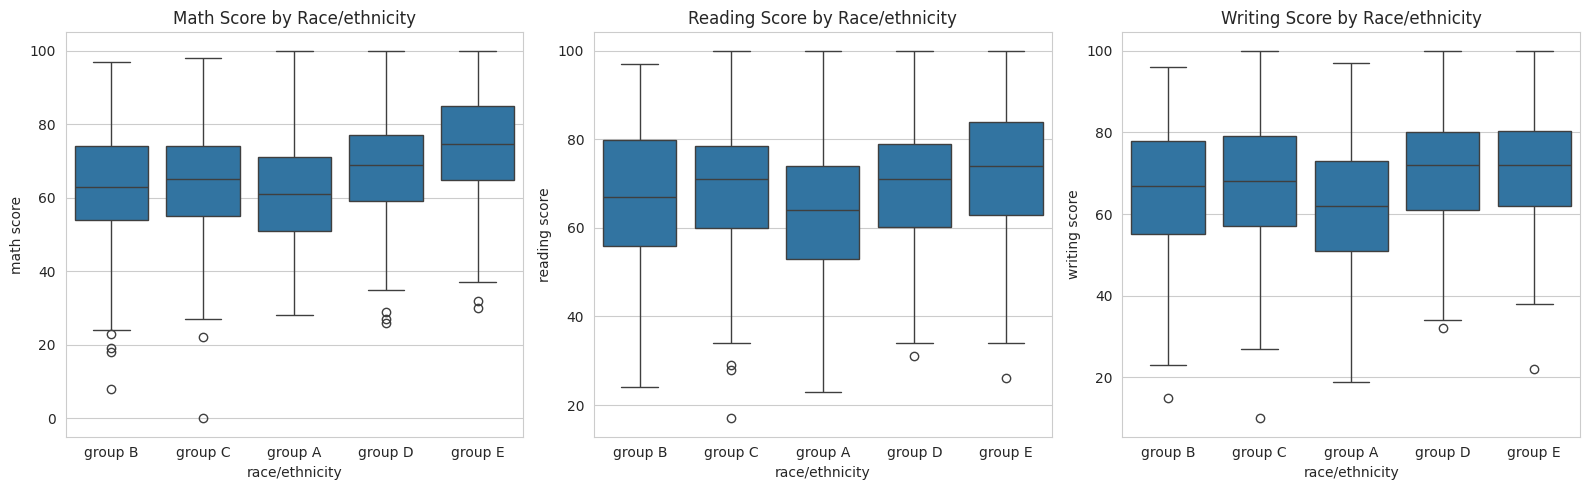

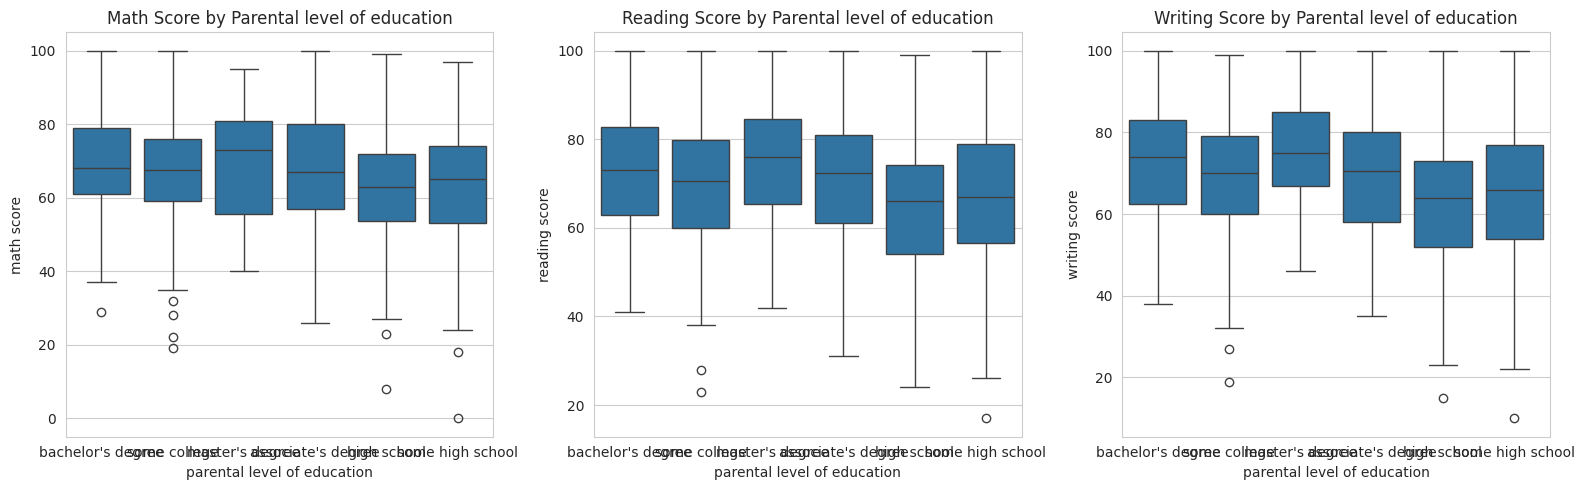

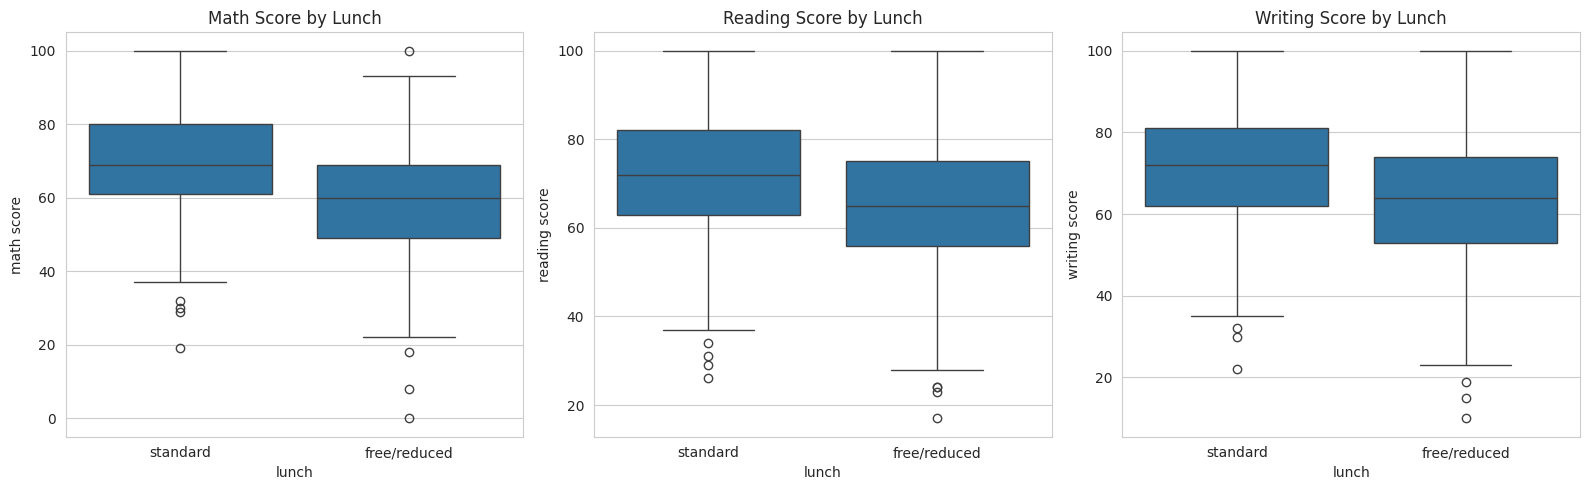

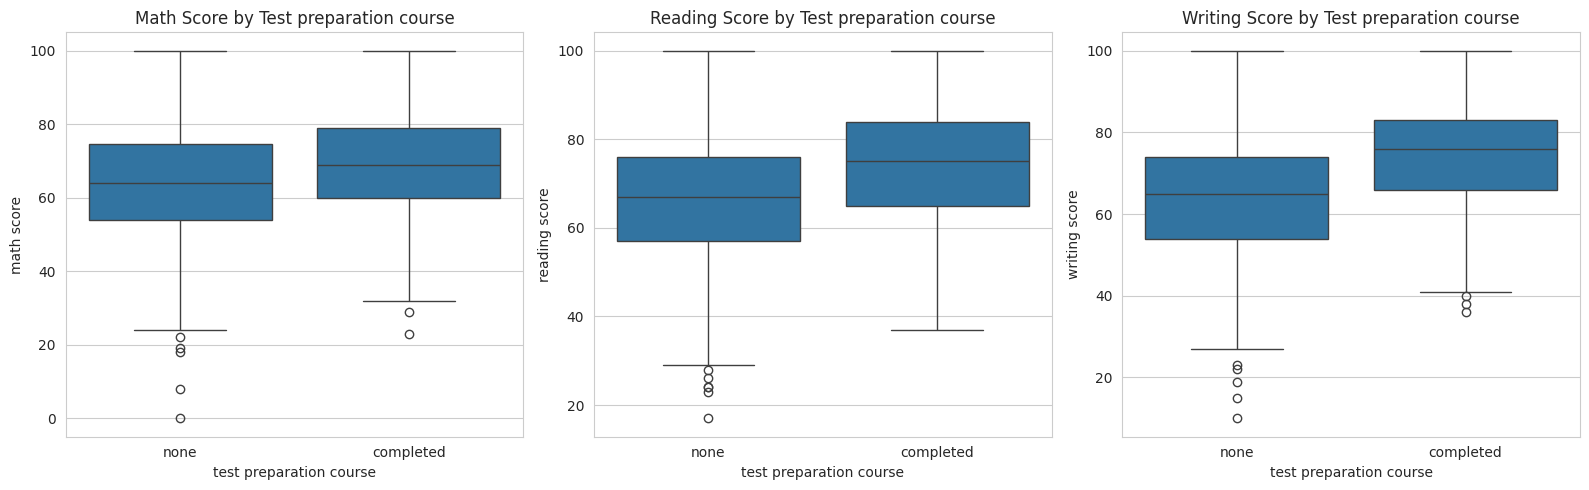

In [13]:
# Set ukuran default plot
plt.figure(figsize=(16, 10))

# Fungsi untuk membuat boxplot berdasarkan kolom yang dipilih
def plot_scores_by_category(category):
    plt.figure(figsize=(16, 5))

    # Membuat subplot untuk math score
    plt.subplot(1, 3, 1)
    sns.boxplot(x=category, y='math score', data=df)
    plt.title(f'Math Score by {category.capitalize()}')

    # Membuat subplot untuk reading score
    plt.subplot(1, 3, 2)
    sns.boxplot(x=category, y='reading score', data=df)
    plt.title(f'Reading Score by {category.capitalize()}')

    # Membuat subplot untuk writing score
    plt.subplot(1, 3, 3)
    sns.boxplot(x=category, y='writing score', data=df)
    plt.title(f'Writing Score by {category.capitalize()}')

    plt.tight_layout()
    plt.show()

# Visualisasi berdasarkan gender
plot_scores_by_category('gender')

# Visualisasi berdasarkan race/ethnicity
plot_scores_by_category('race/ethnicity')

# Visualisasi berdasarkan parental level of education
plot_scores_by_category('parental level of education')

# Visualisasi berdasarkan lunch
plot_scores_by_category('lunch')

# Visualisasi berdasarkan test preparation course
plot_scores_by_category('test preparation course')

Prompt: Beri kode untuk melihat nilai rata-rata seluruh mata pelajaran (math, reading writing) dari setiap siswa dan lihat korelasinya dengan masing-masing kategori

Correlation of average score with each categorical variable:
gender_male                                     -0.130861
race/ethnicity_group B                          -0.078247
race/ethnicity_group C                          -0.030691
race/ethnicity_group D                           0.058902
race/ethnicity_group E                           0.141050
parental level of education_bachelor's degree    0.106599
parental level of education_high school         -0.161936
parental level of education_master's degree      0.102411
parental level of education_some college         0.026761
parental level of education_some high school    -0.087247
lunch_standard                                   0.290064
test preparation course_none                    -0.256710
Name: average_score, dtype: float64


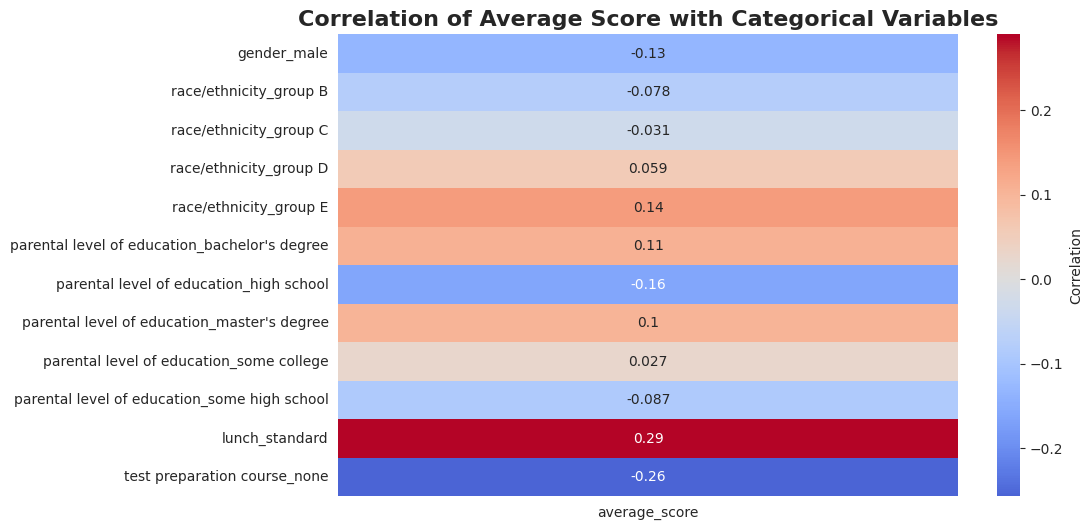

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Calculate the average score for each student
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

# Step 2: Encode categorical variables to numeric
# Convert each categorical column to numerical encoding
categorical_columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
encoded_df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Ensure all columns are numeric before calculating correlations
encoded_df = encoded_df.apply(pd.to_numeric, errors='coerce')

# Step 3: Calculate correlation between average score and encoded categorical variables
correlation_matrix = encoded_df.corr()
average_score_correlation = correlation_matrix['average_score']

# Filter for correlations with categorical columns
relevant_correlations = average_score_correlation[average_score_correlation.index.str.contains('|'.join(categorical_columns))]

# Display the correlation values
print("Correlation of average score with each categorical variable:")
print(relevant_correlations)

# Optional: visualize correlations in a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(relevant_correlations.to_frame(), annot=True, cmap='coolwarm', center=0, cbar_kws={'label': 'Correlation'})
plt.title('Correlation of Average Score with Categorical Variables', fontsize=16, fontweight='bold')
plt.show()
